Análise Exploratória dos Dados — Olist
Panorama Geral do Comportamento de Vendas

1. Introdução

Esta etapa tem como objetivo realizar uma análise exploratória descritiva (EDA) dos dados da Olist, buscando compreender padrões de preço, parcelamento, frete, recorrência de clientes e distribuição regional das vendas.

O foco é caracterizar o comportamento interno da base, sem ainda relacioná-la a variáveis macroeconômicas, que serão incorporadas em uma etapa posterior do projeto.

2. Setup do Ambiente e Padronização Visual

In [199]:
# ajusta path para importar utilidades do projeto
import sys
from pathlib import Path

sys.path.append(str(Path.cwd().parent))


In [200]:
# bibliotecas principais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# importa padrão visual do projeto
from utils.viz_config import PALETA_OLIST


In [201]:
df = pd.read_csv('../dados/OLIST_DATA.csv')

In [202]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,ano_mes,dia_semana
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.00,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,utilidades_domesticas,40.00,268.00,4.00,500.00,19.00,8.00,13.00,1.00,credit_card,1.00,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.00,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,2017-10,Monday
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.00,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,utilidades_domesticas,40.00,268.00,4.00,500.00,19.00,8.00,13.00,3.00,voucher,1.00,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.00,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,2017-10,Monday
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.00,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,utilidades_domesticas,40.00,268.00,4.00,500.00,19.00,8.00,13.00,2.00,voucher,1.00,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.00,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,2017-10,Monday
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.00,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,perfumaria,29.00,178.00,1.00,400.00,19.00,13.00,19.00,1.00,boleto,1.00,141.46,8d5266042046a06655c8db133d120ba5,4.00,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,2018-07,Tuesday
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.00,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,automotivo,46.00,232.00,1.00,420.00,24.00,19.00,21.00,1.00,credit_card,3.00,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.00,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,2018-08,Wednesday


In [203]:
df.shape

(119143, 38)

In [204]:
cols_data = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]

for col in cols_data:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')


In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 38 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       119143 non-null  object        
 1   customer_id                    119143 non-null  object        
 2   order_status                   119143 non-null  object        
 3   order_purchase_timestamp       119143 non-null  datetime64[ns]
 4   order_approved_at              118966 non-null  datetime64[ns]
 5   order_delivered_carrier_date   117057 non-null  datetime64[ns]
 6   order_delivered_customer_date  115722 non-null  datetime64[ns]
 7   order_estimated_delivery_date  119143 non-null  datetime64[ns]
 8   order_item_id                  118310 non-null  float64       
 9   product_id                     118310 non-null  object        
 10  seller_id                      118310 non-null  object        
 11  

In [206]:
df.describe()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,price,freight_value,customer_zip_code_prefix,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_installments,payment_value,review_score
count,119143,118966,117057,115722,119143,"118,310.00","118,310.00","118,310.00","119,143.00","116,601.00","116,601.00","116,601.00","118,290.00","118,290.00","118,290.00","118,290.00","119,140.00","119,140.00","119,140.00","118,146.00"
mean,2017-12-29 18:36:13.115760128,2017-12-30 04:49:18.425726976,2018-01-03 08:24:34.395524864,2018-01-12 20:55:38.199616,2018-01-22 15:21:10.241642240,1.20,120.65,20.03,"35,033.45",48.77,785.97,2.21,"2,112.25",30.27,16.62,23.07,1.09,2.94,172.74,4.02
min,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,1.00,0.85,0.00,"1,003.00",5.00,4.00,1.00,0.00,7.00,2.00,6.00,1.00,0.00,0.00,1.00
25%,2017-09-10 20:15:46,2017-09-11 15:50:48.500000,2017-09-14 19:52:12,2017-09-22 21:54:31.249999872,2017-10-02 00:00:00,1.00,39.90,13.08,"11,250.00",42.00,346.00,1.00,300.00,18.00,8.00,15.00,1.00,1.00,60.85,4.00
50%,2018-01-17 11:59:12,2018-01-17 16:49:49,2018-01-23 17:03:08,2018-02-01 03:17:55,2018-02-14 00:00:00,1.00,74.90,16.28,"24,240.00",52.00,600.00,1.00,700.00,25.00,13.00,20.00,1.00,2.00,108.16,5.00
75%,2018-05-03 13:18:30,2018-05-03 16:56:53,2018-05-07 14:57:00,2018-05-15 00:08:31.500000,2018-05-25 00:00:00,1.00,134.90,21.18,"58,475.00",57.00,983.00,3.00,"1,800.00",38.00,20.00,30.00,1.00,4.00,189.24,5.00
max,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00,21.00,"6,735.00",409.68,"99,990.00",76.00,"3,992.00",20.00,"40,425.00",105.00,105.00,118.00,29.00,24.00,"13,664.08",5.00
std,NaN,NaN,NaN,NaN,NaN,0.70,184.11,15.84,"29,823.20",10.03,652.58,1.72,"3,786.70",16.19,13.45,11.75,0.73,2.78,267.78,1.40


Já podemos observar aqui assimetria acentuada nas variáveis monetárias, incluindo valores extremos e diferenças relevantes entre média e mediana.

❗Após o processo de junção das tabelas originais da Olist, a base encontra-se no nível de item, ou seja, um mesmo pedido pode aparecer em múltiplas linhas.

6. Agregação para o Nível de Pedido

Para evitar duplicações estatísticas, a análise passa a considerar o pedido como unidade básica, agregando itens pertencentes ao mesmo order_id.

In [207]:
df_cc = df[df['payment_type'] == 'credit_card']

# Agregações principais
order_agg = (
    df_cc
    .groupby('order_id')
    .agg({
        'order_purchase_timestamp': 'first',
        'customer_unique_id': 'first',
        'customer_state': 'first',
        'price': 'sum',
        'freight_value': 'sum',
        'payment_installments': 'max'
    })
    .rename(columns={
        'price': 'order_value_total',
        'payment_installments': 'installments_max'
    })
    .reset_index()
)


# Parcelamento ponderado pelo valor pago
def calc_weighted_installments(group):
    mask = group['payment_value'] > 0
    if mask.sum() == 0:
        return np.nan
    return np.average(
        group.loc[mask, 'payment_installments'],
        weights=group.loc[mask, 'payment_value']
    )

# Métrica derivada
# Participação percentual do frete no valor do pedido
order_agg['freight_ratio'] = (
    order_agg['freight_value'] / order_agg['order_value_total']
)

order_agg.describe()


,order_purchase_timestamp,order_value_total,freight_value,installments_max,freight_ratio
count,76505,"76,505.00","76,505.00","76,505.00","75,991.00"
mean,2018-01-01 12:04:48.941794560,144.02,22.99,3.51,0.30
min,2016-09-04 21:15:19,0.00,0.00,0.00,0.00
25%,2017-09-14 09:47:20,48.90,13.86,1.00,0.13
50%,2018-01-21 13:20:39,89.90,17.38,3.00,0.22
75%,2018-05-04 20:23:00,157.99,24.73,5.00,0.37
max,2018-08-29 15:00:37,"13,440.00",711.33,24.00,21.45
std,NaN,221.57,21.15,2.85,0.30


In [208]:
print('Total de pedidos:', order_agg['order_id'].nunique())
print('Total de clientes únicos:', order_agg['customer_unique_id'].nunique())

print('Período:')
print(order_agg['order_purchase_timestamp'].min())
print(order_agg['order_purchase_timestamp'].max())


Total de pedidos: 76505
Total de clientes únicos: 74092
Período:
2016-09-04 21:15:19
2018-08-29 15:00:37


9. Distribuição do Valor dos Pedidos

Histograma — Escala Original

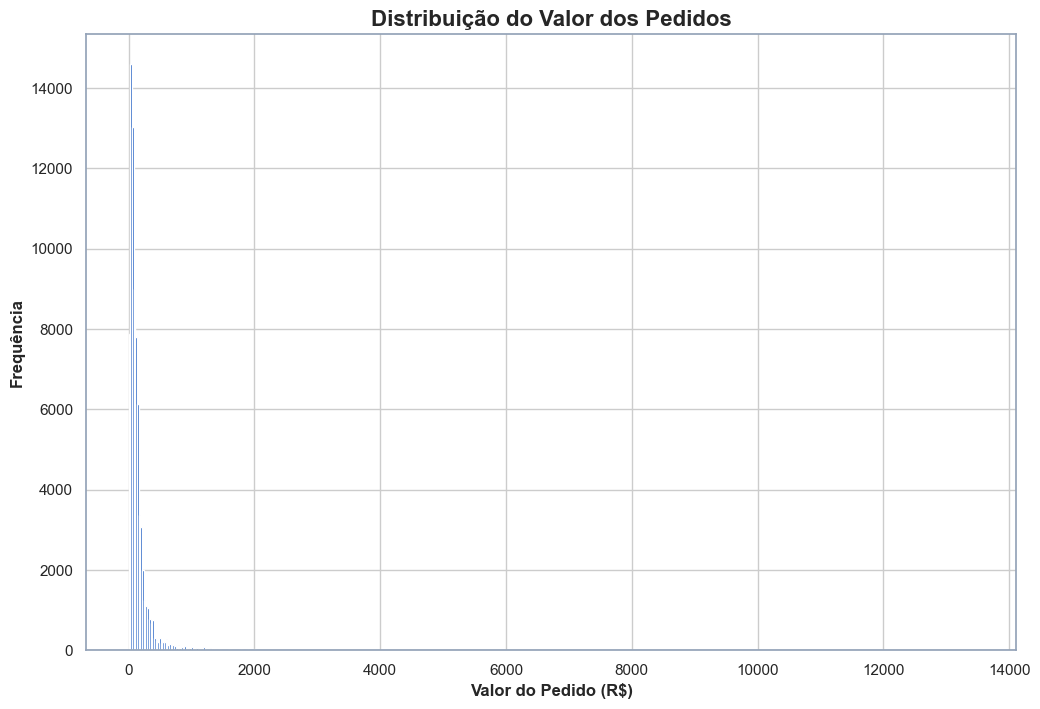

In [209]:
plt.figure()
plt.hist(order_agg['order_value_total'], bins=500)
plt.title('Distribuição do Valor dos Pedidos')
plt.xlabel('Valor do Pedido (R$)')
plt.ylabel('Frequência')
plt.show()

# forte concentração em valores baixos, característica típica de dados de vendas no varejo online.


Histograma — Escala Logarítmica

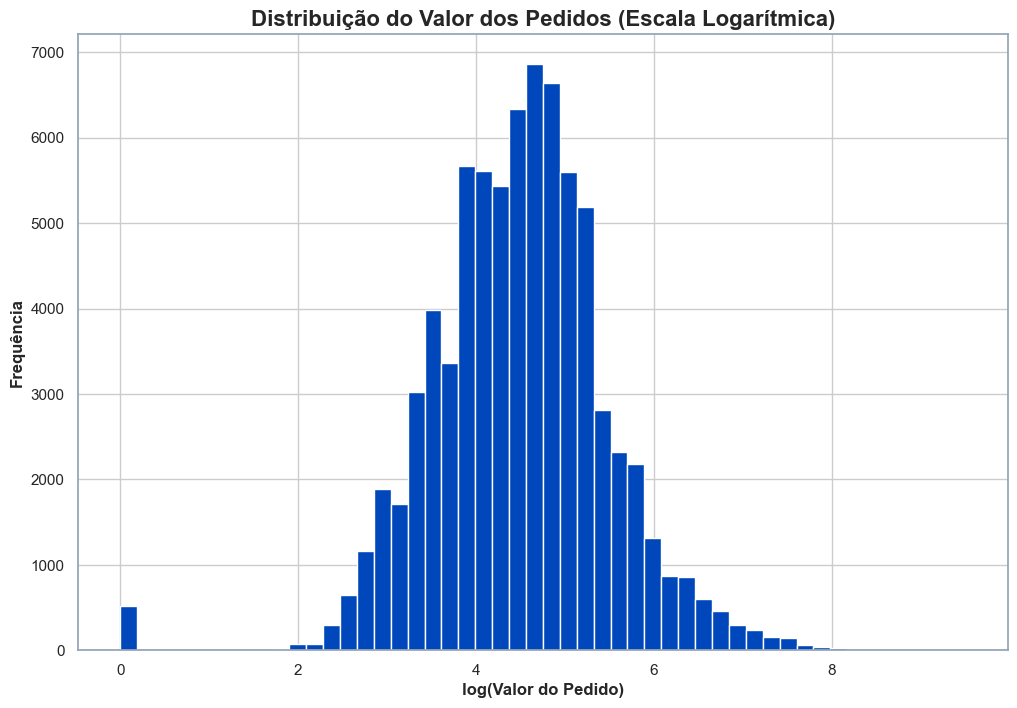

In [210]:
plt.figure()
plt.hist(np.log1p(order_agg['order_value_total']), bins=50)
plt.title('Distribuição do Valor dos Pedidos (Escala Logarítmica)')
plt.xlabel('log(Valor do Pedido)')
plt.ylabel('Frequência')
plt.show()

# A transformação logarítmica reduz a influência dos outliers e revela melhor a estrutura central da distribuição


Boxplot do Valor dos Pedidos

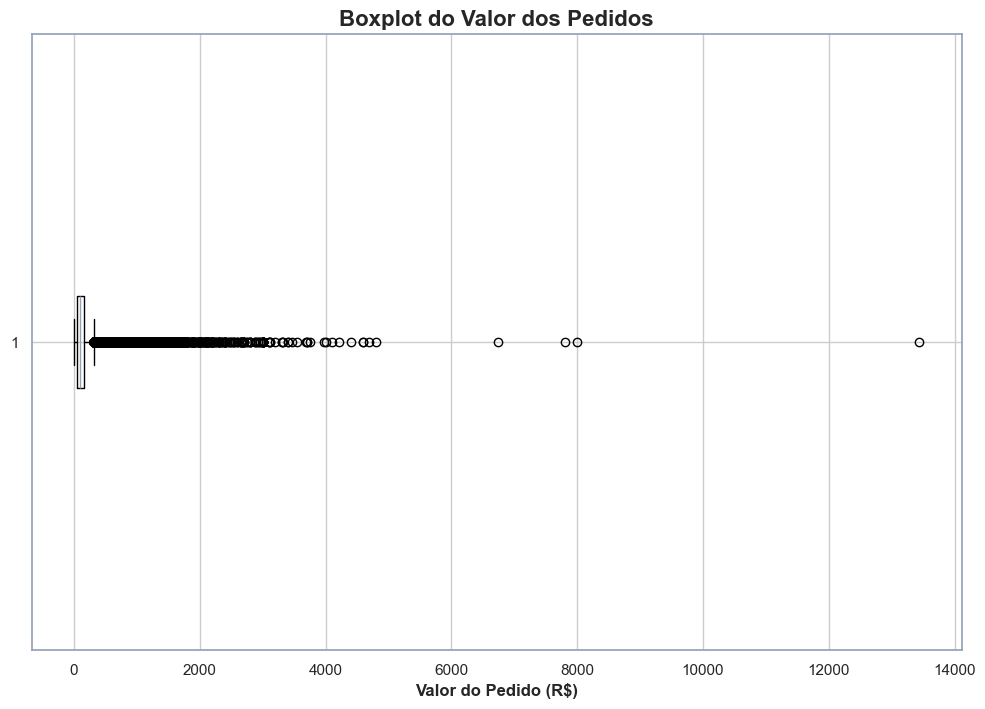

In [211]:
plt.figure()
plt.boxplot(order_agg['order_value_total'], vert=False)
plt.title('Boxplot do Valor dos Pedidos')
plt.xlabel('Valor do Pedido (R$)')
plt.show()


Curva de Pareto — Faturamento Concentrado

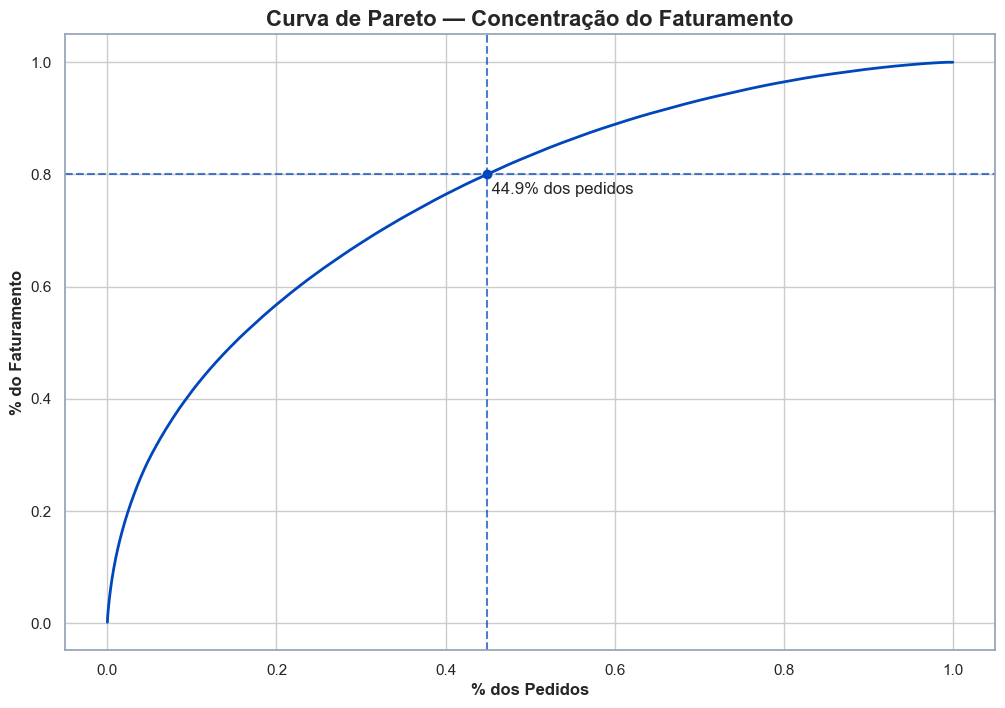

In [212]:
# Ordena pedidos por valor
pareto = order_agg.sort_values('order_value_total', ascending=False).reset_index(drop=True)

pareto['faturamento_acumulado'] = pareto['order_value_total'].cumsum()
pareto['percentual_faturamento'] = pareto['faturamento_acumulado'] / pareto['order_value_total'].sum()
pareto['percentual_pedidos'] = (pareto.index + 1) / len(pareto)

# ponto onde atinge 80% do faturamento
idx_80 = pareto[pareto['percentual_faturamento'] >= 0.8].index[0]
perc_pedidos_80 = pareto.loc[idx_80, 'percentual_pedidos']

plt.figure()
plt.plot(
    pareto['percentual_pedidos'],
    pareto['percentual_faturamento'],
    linewidth=2
)

plt.axhline(0.8, linestyle='--', alpha=0.7)
plt.axvline(perc_pedidos_80, linestyle='--', alpha=0.7)

plt.scatter(
    perc_pedidos_80,
    0.8,
    zorder=5
)

plt.text(
    perc_pedidos_80,
    0.8 - 0.04, # ajuste apenas para ficar legível o texto
    f' {perc_pedidos_80:.1%} dos pedidos',
    va='bottom'
)

plt.title('Curva de Pareto — Concentração do Faturamento')
plt.xlabel('% dos Pedidos')
plt.ylabel('% do Faturamento')
plt.show()

# 44% dos pedidos concentram 80% do faturamento

10. Parcelamento

Frequência de Parcelas

In [213]:
order_agg['installments_max'].value_counts().sort_index()

installments_max
0.00         2
1.00     25333
2.00     12363
3.00     10429
4.00      7070
5.00      5227
6.00      3908
7.00      1622
8.00      4251
9.00       644
10.00     5315
11.00       23
12.00      133
13.00       16
14.00       15
15.00       74
16.00        5
17.00        8
18.00       27
20.00       17
21.00        3
22.00        1
23.00        1
24.00       18
Name: count, dtype: int64

Parcelamento × Valor do Pedido (Boxplot por Faixa)

C:\Users\cauap\AppData\Local\Temp\ipykernel_49772\2522076289.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(min(len(x), 300)))


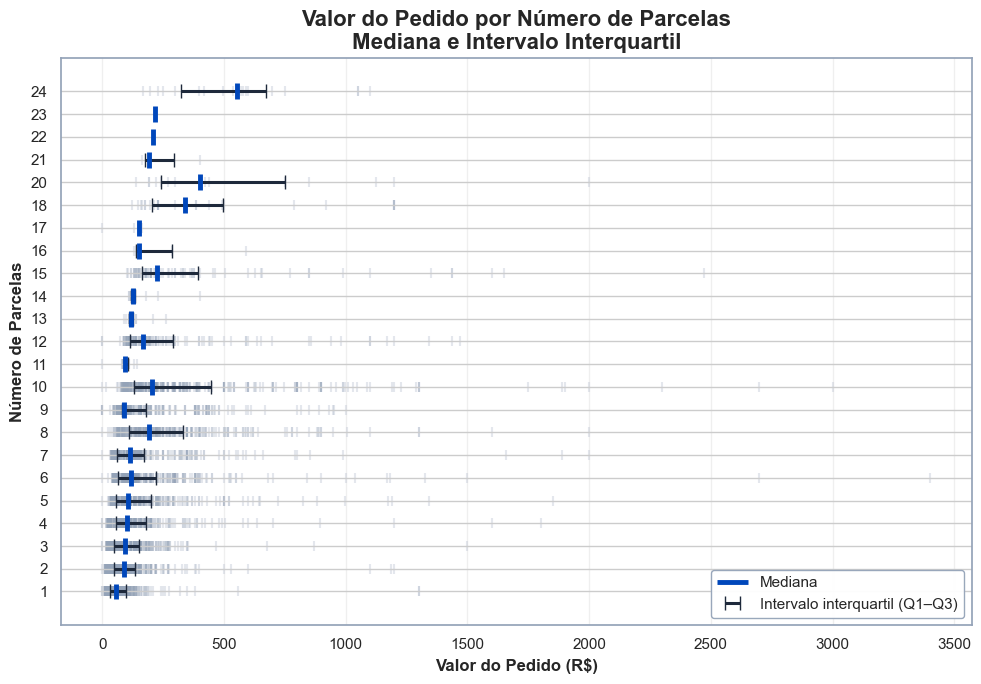

In [214]:
# 1. Filtra apenas pedidos parcelados (cartão de crédito)
# Parcelas >= 1 eliminam pagamentos à vista ou inconsistências
order_cc = order_agg[
    order_agg['installments_max'] >= 1
]

# 2. Amostragem para visualização da densidade
# Limita a quantidade de pontos por faixa de parcelas
# evitando poluição visual no gráfico
np.random.seed(42)

sample = (
    order_cc
    .groupby('installments_max', group_keys=False)
    .apply(lambda x: x.sample(min(len(x), 300)))
)

summary = (
    order_cc
    .groupby('installments_max')['order_value_total']
    .quantile([0.25, 0.5, 0.75])
    .unstack()
    .sort_index()
)

# Posições categóricas no eixo Y
y_pos = np.arange(len(summary))

plt.figure(figsize=(10, 7))

# Intervalo Interquartil (Q1–Q3)
plt.errorbar(
    summary[0.5],
    y_pos,
    xerr=[
        summary[0.5] - summary[0.25],
        summary[0.75] - summary[0.5]
    ],
    fmt='none',
    ecolor=PALETA_OLIST[2],
    capsize=5,
    linewidth=2.2,
    label='Intervalo interquartil (Q1–Q3)',
    zorder=1
)

# Mediana
plt.vlines(
    summary[0.5],
    y_pos - 0.35,
    y_pos + 0.35,
    colors=PALETA_OLIST[0],
    linewidth=3.5,
    label='Mediana',
    zorder=2
)

# Eixo Y categórico (parcelas)
plt.yticks(
    y_pos,
    summary.index.astype(int)
)

# Legenda
plt.legend(
    loc='lower right',
    frameon=True,
    facecolor='white',
    edgecolor=PALETA_OLIST[1],
    framealpha=0.95
)

plt.xlabel('Valor do Pedido (R$)')
plt.ylabel('Número de Parcelas')
plt.title(
    'Valor do Pedido por Número de Parcelas\n'
    'Mediana e Intervalo Interquartil'
)

#Camada de densidade (rug plot)
for i, parcelas in enumerate(summary.index):
    values = sample.loc[
        sample['installments_max'] == parcelas,
        'order_value_total'
    ]

    plt.scatter(
        values,
        np.full_like(values, y_pos[i]),
        marker='|',
        color=PALETA_OLIST[1],
        alpha=0.25,
        s=60,
        zorder=0
    )

plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


O gráfico apresenta a relação entre o valor dos pedidos e o número de parcelas utilizadas em compras parceladas no cartão de crédito. Para cada faixa de parcelamento, o traço azul indica a mediana do valor do pedido, enquanto a linha horizontal representa o intervalo interquartil (Q1–Q3), capturando a dispersão central dos dados e reduzindo a influência de valores extremos.

Observa-se que, à medida que o número de parcelas aumenta, a mediana do valor do pedido tende a crescer, indicando que o parcelamento é utilizado principalmente como mecanismo de viabilização de compras de maior valor. Ainda assim, a sobreposição parcial dos intervalos interquartis sugere que determinados valores de pedido podem ser parcelados em diferentes quantidades, refletindo heterogeneidade no comportamento dos consumidores ou condições de oferta de crédito específicas.

A camada adicional de densidade, representada por pequenos traços horizontais (rug plot), indica regiões de maior concentração de pedidos ao longo do eixo de valor. Essa visualização permite identificar não apenas a posição da mediana, mas também onde efetivamente se concentram os volumes de transações, enriquecendo a análise sem comprometer a clareza do gráfico.

Valor Mediano por Número de Parcelas

In [215]:

order_agg.groupby('installments_max')['order_value_total'].median()

# Trivialmente, pedidos com maior número de parcelas apresentam valores medianos mais elevados.

installments_max
0.00     64.64
1.00     55.80
2.00     89.99
3.00     91.99
4.00     99.54
5.00    107.50
6.00    119.90
7.00    112.94
8.00    189.90
9.00     89.90
10.00   205.81
11.00    93.90
12.00   165.99
13.00   117.78
14.00   127.90
15.00   223.18
16.00   152.00
17.00   149.99
18.00   339.44
20.00   400.00
21.00   189.90
22.00   209.99
23.00   216.00
24.00   553.38
Name: order_value_total, dtype: float64

11. Peso do Frete por faixas

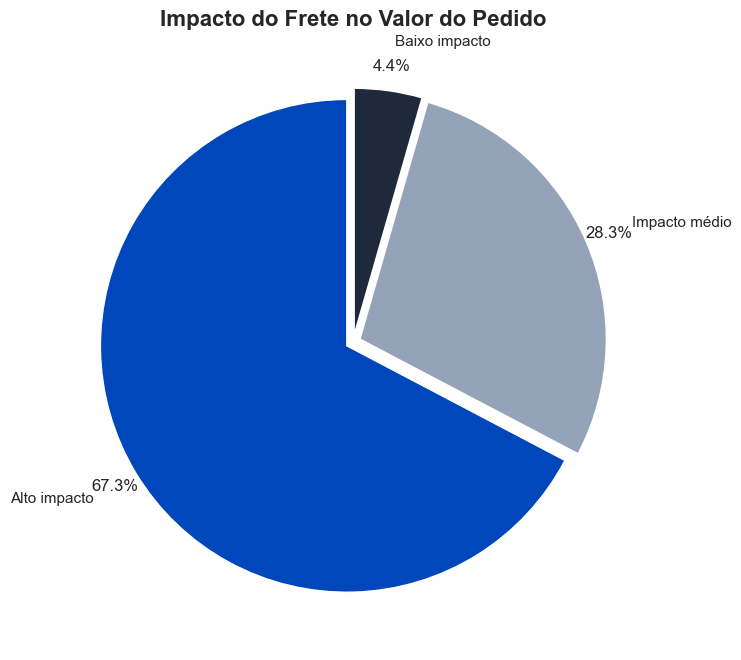

In [216]:
order_agg['frete_faixa'] = pd.cut(
    order_agg['freight_ratio'],
    bins=[0, 0.05, 0.15, 1],
    labels=['Baixo impacto', 'Impacto médio', 'Alto impacto']
)

frete_dist = order_agg['frete_faixa'].value_counts(normalize=True)

plt.figure()
plt.pie(
    frete_dist,
    labels=frete_dist.index,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=1.10,
    labeldistance=1.20,
    explode=[0.03] * len(frete_dist)
)

plt.title('Impacto do Frete no Valor do Pedido')
plt.show()



12. Análise Regional

In [217]:
orders_by_state = (
    order_agg.groupby('customer_state')
    .agg(
        pedidos=('order_id', 'count'),
        faturamento=('order_value_total', 'sum'),
        ticket_medio=('order_value_total', 'mean'),
        ticket_mediano=('order_value_total', 'median')
    )
    .sort_values('faturamento', ascending=False)
)

orders_by_state


,pedidos,faturamento,ticket_medio,ticket_mediano
customer_state,,,,
SP,32074,"4,191,055.18",130.67,80.00
RJ,10253,"1,516,902.89",147.95,96.99
MG,9030,"1,284,028.61",142.20,89.99
RS,3967,"581,006.84",146.46,89.99
PR,3776,"544,201.45",144.12,89.90
BA,2643,"431,117.12",163.12,99.80
SC,2705,"420,174.33",155.33,98.90
DF,1695,"259,928.67",153.35,90.97
GO,1514,"236,217.42",156.02,98.00


Faturamento vs Ticket Médio

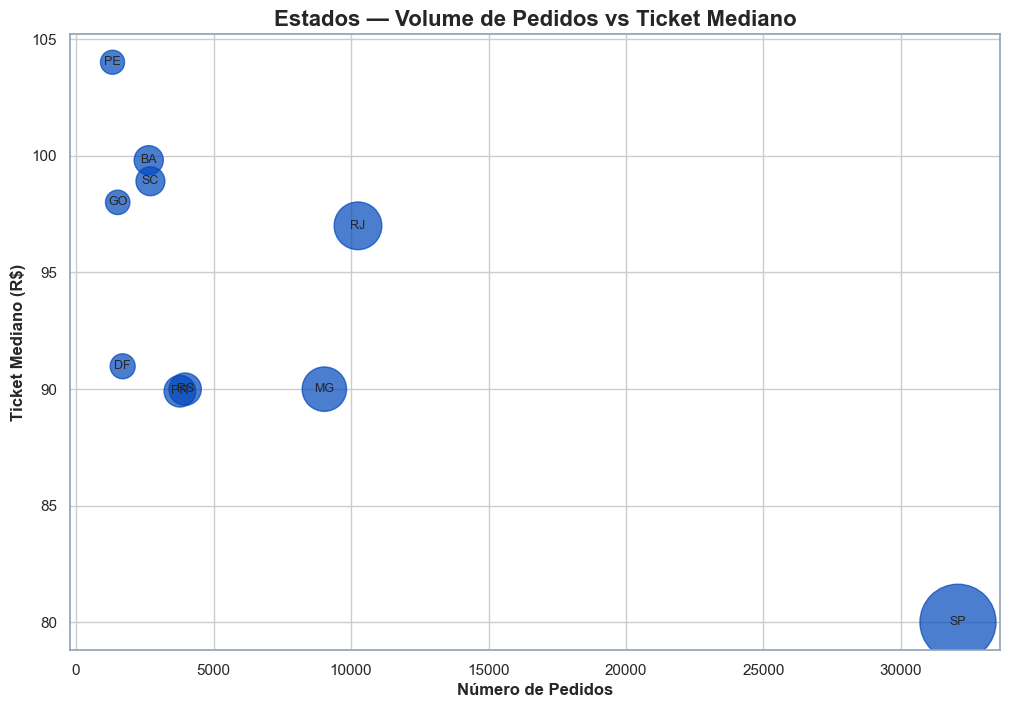

In [218]:
top_states = orders_by_state.head(10)

# normalização do tamanho das bolhas
min_size = 300
max_size = 3000

sizes = (
    (top_states['faturamento'] - top_states['faturamento'].min()) /
    (top_states['faturamento'].max() - top_states['faturamento'].min())
) * (max_size - min_size) + min_size

plt.figure()
plt.scatter(
    top_states['pedidos'],
    top_states['ticket_mediano'],
    s=sizes,
    alpha=0.7
)

for state in top_states.index:
    plt.text(
        top_states.loc[state, 'pedidos'],
        top_states.loc[state, 'ticket_mediano'],
        state,
        fontsize=9,
        ha='center',
        va='center'
    )

plt.title('Estados — Volume de Pedidos vs Ticket Mediano')
plt.xlabel('Número de Pedidos')
plt.ylabel('Ticket Mediano (R$)')
plt.show()


O ticket médio é sensível a pedidos extremos de alto valor, comuns no e-commerce.
O ticket mediano representa melhor o comportamento típico do consumidor

13. Reincidência de Clientes

In [219]:
orders_per_customer = (
    order_agg.groupby('customer_unique_id')
    .size()
)

orders_per_customer.value_counts().sort_index()

# A maioria dos clientes realiza apenas um pedido
# uma parcela menor apresenta comportamento recorrente.

1     71917
2      2007
3       132
4        23
5         7
6         3
7         1
9         1
17        1
Name: count, dtype: int64

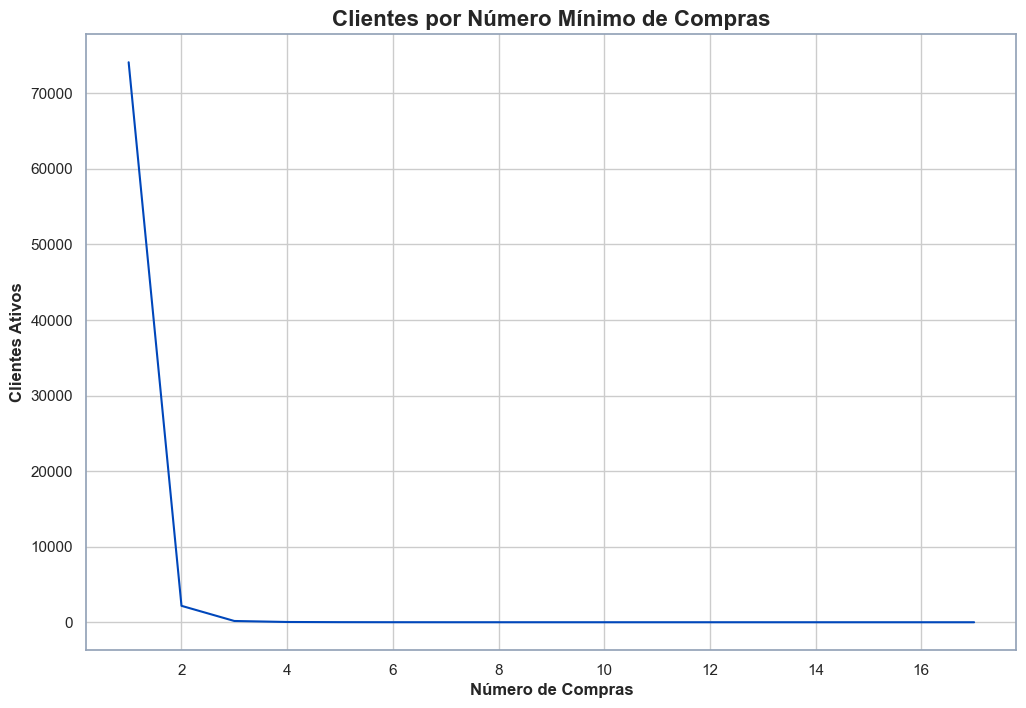

In [220]:
recorrencia = orders_per_customer.value_counts().sort_index()
recorrencia_acumulada = recorrencia[::-1].cumsum()[::-1]

plt.figure()
plt.plot(recorrencia_acumulada.index, recorrencia_acumulada.values)
plt.title('Clientes por Número Mínimo de Compras')
plt.xlabel('Número de Compras')
plt.ylabel('Clientes Ativos')
plt.show()

# A base é majoritariamente composta por clientes de compra única, com queda acentuada na recorrência.


Conclusão da Análise Exploratória

A análise exploratória revela forte concentração do faturamento em poucos pedidos, papel relevante do parcelamento como viabilizador de tickets mais altos e impacto significativo do frete em pedidos de menor valor. Observa-se também heterogeneidade regional e baixa recorrência de clientes, fatores fundamentais para a interpretação dos efeitos macroeconômicos nas vendas.

A partir daqui estaremos tratando os dados da OLIST para estarem compatíveis a cruzamento com dados do BC.
Isto incluir ajuste na série temporal e também agregações, já que originalmente os dados estão a nível item e estamos voltados a dados financeiros, por sua vez estão a nível pedido.

In [221]:
# Valor financeiro por categoria dentro de cada pedido
# pois como estamos agregando podem haver pedidos com produtos de múltiplas categorias
# e, no caso, manteremos a categoria dominante
order_category_value = (
    df
    .assign(item_value=lambda x: x['price'] + x['freight_value'])
    .groupby(['order_id', 'product_category_name'])['item_value']
    .sum()
    .reset_index()
)

# Categoria dominante = maior valor dentro do pedido
order_category_dominant = (
    order_category_value
    .sort_values(['order_id', 'item_value'], ascending=[True, False])
    .groupby('order_id')
    .first()
    .reset_index()
    [['order_id', 'product_category_name']]
)

order_agg = (
    order_agg
    .merge(order_category_dominant, on='order_id', how='left')
)

# mantendo apenas dados referentes a crédito
order_cc = order_agg[
    order_agg['installments_max'] >= 1
].copy()

# evitando compras descategorizadas
order_cc = order_cc.dropna(subset=['product_category_name'])


# Garantir datetime
order_cc['order_purchase_timestamp'] = pd.to_datetime(
    order_cc['order_purchase_timestamp']
)

# Criar coluna mensal padrão
order_cc['Date'] = (
    order_cc['order_purchase_timestamp']
    .dt.to_period('M')
    .dt.to_timestamp()
)

# Agregação mensal por categoria
olist_category_time = (
    order_cc
    .groupby(['Date', 'product_category_name'])
    .agg(
        total_pedidos=('order_id', 'nunique'),
        ticket_medio=('order_value_total', 'mean'),
        ticket_mediana=('order_value_total', 'median'),
        parcelas_media=('installments_max', 'mean'),
        parcelas_mediana=('installments_max', 'median'),
        faturamento_total=('order_value_total', 'sum')
    )
    .reset_index()
)

olist_category_time.to_csv(
    'olist_agregada_mes.csv',
    index=False,
    encoding='utf-8'
)

print('CSV salvo: olist_agregada_mes.csv')



CSV salvo: olist_agregada_mes.csv
